# Redes Neuronales

En este notebook vamos a construir la unidad básica de las redes neuronales, el Perceptrón. Tiene dos partes:
1. **Perceptrón 2D**: vamos a entrenar un Perceptrón con Keras sobre un dataset ficticio. Exploramos cómo son las fronteras en 2D. Limitaciones del Perceptrón. Generamos un dataset no-linealmente separable y vemos cómo responde el Perceptrón.
2. **MNIST**: vamos a trabajar con este conocido dataset. El objetivo es identificar dígitos, del 0 al 9, escritos a manos. Primero entrenaremos una red neuronal de una capa y luego una Red Neuronal de más capas.

## 1. Perceptrón en 2D

Vamos a generar un dataset sintético con unas funciones que ya vienen incorporadas en scikit-learn.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
from sklearn.datasets.samples_generator import make_blobs, make_moons, make_circles

#X, y = make_blobs(n_samples=1000, centers=2, n_features=2,random_state=0)
#X, y = make_moons(n_samples=1000, random_state=0)
X, y = make_circles(n_samples=1000, random_state=0)

/home/nacho/miniconda3/envs/ds/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
print(X.shape)
print(y.shape)

(1000, 2)
(1000,)


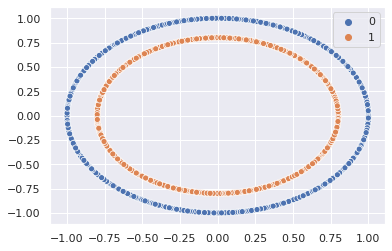

In [4]:
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)
plt.show()

Reescalamos los datos

In [5]:
X

array([[ 0.79690689, -0.07028096],
       [-0.15976798, -0.78388404],
       [-0.8235326 , -0.56726895],
       ...,
       [-0.04019545,  0.79898957],
       [ 0.59001049,  0.54026625],
       [-0.54026625,  0.59001049]])

In [6]:
X[:,0] = (X[:,0] - X[:,0].mean())/X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean())/X[:,1].std()

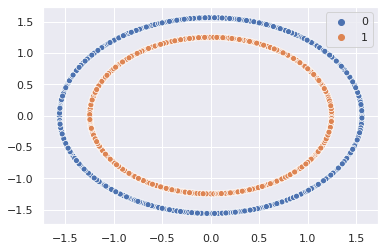

In [7]:
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)
plt.show()

Definimos el modelo a entrenar y volvemos a mirar algunas de sus características.

In [8]:
model = Sequential()
model.add(Dense(4, activation='relu'))
model.add(Dense(6, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.0, beta_2=0.0, decay=0.0, amsgrad=False)
model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(X, y, epochs=500, validation_split=0.25) #Prueben con mas epochs

Train on 750 samples, validate on 250 samples
Epoch 1/500
750/750 [==============================] - 1s 1ms/step - loss: 0.7028 - accuracy: 0.4987 - val_loss: 0.7124 - val_accuracy: 0.4800
Epoch 2/500
750/750 [==============================] - 0s 219us/step - loss: 0.6999 - accuracy: 0.5040 - val_loss: 0.7080 - val_accuracy: 0.4760
Epoch 3/500
750/750 [==============================] - 0s 235us/step - loss: 0.6976 - accuracy: 0.4973 - val_loss: 0.7051 - val_accuracy: 0.4800
Epoch 4/500
750/750 [==============================] - 0s 262us/step - loss: 0.6963 - accuracy: 0.5107 - val_loss: 0.7027 - val_accuracy: 0.4800
Epoch 5/500
750/750 [==============================] - 0s 230us/step - loss: 0.6950 - accuracy: 0.5040 - val_loss: 0.7006 - val_accuracy: 0.4760
Epoch 6/500
750/750 [==============================] - 0s 220us/step - loss: 0.6937 - accuracy: 0.5053 - val_loss: 0.6980 - val_accuracy: 0.4760
Epoch 7/500
750/750 [==============================] - 0s 219us/step - loss: 0.6928 - 

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [12]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


Notar que se agregaron una keys, asociadas al set de validación. Grafiquemos.

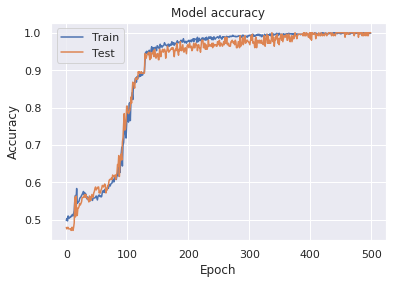

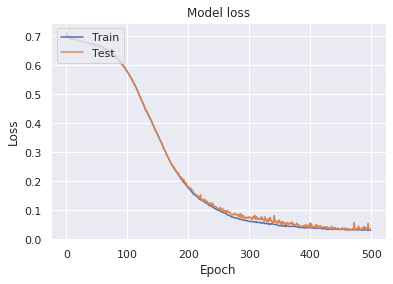

In [13]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

¿Cuántos parámetros tiene ahora el modelo?

In [14]:
print(model.get_weights())

[array([[-0.2184801 ,  0.6456756 , -0.9468115 , -0.26868957],
       [ 0.4038639 ,  1.0076761 ,  0.05512317,  0.527362  ]],
      dtype=float32), array([ 0.8099956 , -0.07204469, -0.0020001 , -0.06496539], dtype=float32), array([[ 0.822364  , -1.5706773 , -0.84681094,  1.3937687 , -1.5431721 ,
        -1.3745984 ],
       [-0.37606785,  0.7243054 ,  0.39371696, -0.6274024 , -0.872675  ,
         0.58935297],
       [-0.316099  ,  0.917084  ,  0.43532822, -0.768977  ,  0.7134606 ,
         0.6646649 ],
       [-0.65137357,  1.2152765 ,  0.7553437 , -0.998616  ,  1.4582127 ,
         1.2272688 ]], dtype=float32), array([-0.21786903,  0.28397778,  0.14802934, -0.30614606,  0.21998441,
        0.28994265], dtype=float32), array([[  7.275765 ],
       [-11.520043 ],
       [ -9.293182 ],
       [ 10.3286705],
       [ -4.3240457],
       [-10.224091 ]], dtype=float32), array([-0.3680993], dtype=float32)]


Y graficamos las fronteras de decisión. ¿Notan que ya no es una frontera abrupta, sino que hay una zona de cambio?¿A qué se debe?

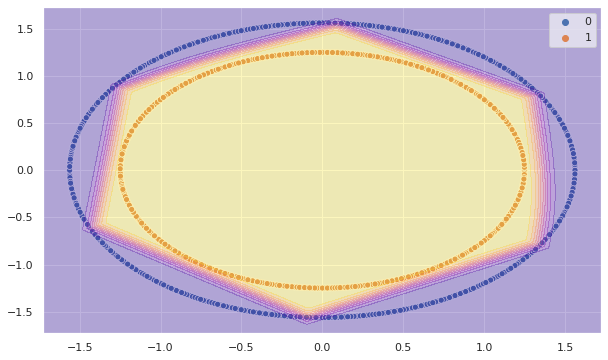

In [15]:
plt.figure(figsize = (10,6))

ax = sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
contours = ax.contourf(xx, yy, Z, levels = 10, alpha=0.3, cmap = 'plasma')
plt.show()

**Ejercicio:** volver a correr esta sección, pero reemplazando la función que genera los datos `make_blobs` por `make_moons`. ¿Qué problema ven en el resultado?¿Y si hacen lo mismo para `make_circles?`

**Ejercicio**: con los datos producidos por `make_moons`, agregar una capa a la red neuronal, con 10 neuronas y función de activación `relu`.

**Ejercicio**: repetir el ejercicio anterior, pero para los datos producidos por `make_circles`.

## 2. MNIST

El dataset de MNIST es un dataset muy conocido. Consiste en dígitos escritos a mano. Muchas modelos de redes neuronales son probados primeros en este set. Pueden encontrar una descripción más detallada, y un ranking de modelos con su desempeño, en el siguiente link.

https://en.wikipedia.org/wiki/MNIST_database

Vamos a arrancar con una sola capa, con una activación `softmax`, ya que se trata de diez clases.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import random
from sklearn.model_selection import train_test_split
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras

**1. Carga de datos**

Cada instancia del dataset es una imagen guardada en una carpeta con la etiqueta correspondiente.

In [17]:
directorio = 'MNIST/'

Miramos las carpetas que hay adentro de la carpeta MNIST

In [18]:
print(os.listdir(directorio))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


Creamos los contenedores vacíos

In [19]:
todas_imagenes = []
y_todas_imagenes = []

y los llenamos.

In [20]:
digitos = np.arange(0,10)
for digito in digitos:
    directorio = 'MNIST/' + str(digito) + '/'
    print(digito, directorio)
    print('Hay', len(os.listdir(directorio)),'imagenes')
    for imagen in os.listdir(directorio):
        todas_imagenes.append(plt.imread(directorio + imagen))
        y_todas_imagenes.append(digito)
        
todas_imagenes = np.array(todas_imagenes)
y_todas_imagenes = np.array(y_todas_imagenes)

0 MNIST/0/
Hay 4132 imagenes
1 MNIST/1/
Hay 4684 imagenes
2 MNIST/2/
Hay 4177 imagenes
3 MNIST/3/
Hay 4351 imagenes
4 MNIST/4/
Hay 4072 imagenes
5 MNIST/5/
Hay 3795 imagenes
6 MNIST/6/
Hay 4137 imagenes
7 MNIST/7/
Hay 4401 imagenes
8 MNIST/8/
Hay 4063 imagenes
9 MNIST/9/
Hay 4188 imagenes


**2. Preprocesado**

**Ejercicio:** Mirar el `shape` de `X` y responder: ¿Cuántas instancias son?¿Qué ancho y largo tienen las imágenes?¿Cuántas bandas?

In [21]:
print(todas_imagenes.shape, y_todas_imagenes.shape)
n_instancias = todas_imagenes.shape[0]
ancho_imagen = todas_imagenes.shape[1]
largo_imagen = todas_imagenes.shape[2]

(42000, 28, 28) (42000,)


Miramos una imagen al azar.

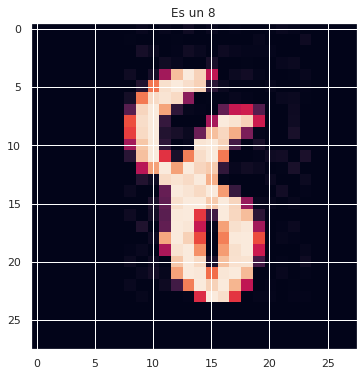

In [23]:
idx_imagen = np.random.randint(0,todas_imagenes.shape[0])
plt.figure(figsize = (6,6))
plt.title('Es un ' + str(y_todas_imagenes[idx_imagen]))
plt.imshow(todas_imagenes[idx_imagen, :, :])
plt.show()

**Ejercicio:** Crear un arreglo `X` que sea igual a `todas_imagenes`, pero de forma `(n_instancias, largo_imagen * ancho_imagen)`.

In [24]:
X = todas_imagenes.reshape(n_instancias, largo_imagen*ancho_imagen)
print(X.shape)

(42000, 784)


**Ejercicio:** Reescalar las imágenes entre 0 y 1.

In [25]:
X = X/255

**Ejercicio:** usar el `to_categorical` de Keras para llevar `y_todas_imagenes` a una columna con unos y ceros para cada clase `y` (One Hot Encoding).

In [27]:
from keras.utils import to_categorical
y = to_categorical(y_todas_imagenes)
print(y.shape)

(42000, 10)


**Ejercicio:** hacer un `train_test_split`. Usar el 20% del dataset como conjunto de test. Fijar el random state en 42.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**3. Entrenamiento del modelo**

Comenzar entrenando un Red Neuronal de una capa, con diez neuronas, función de activación `softmax` y pérdida `categorical_crossentropy`. Usar como optimizador `Adam` y `epoch = 20`.

In [30]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras

model = Sequential()
model.add(Dense(10, activation='softmax'))

optimizador = keras.optimizers.Adam(lr=0.001, beta_1=0.0, beta_2=0.0, decay=0.0, amsgrad=False)

model.compile(optimizer=optimizador,loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_test, y_test, epochs=20, validation_split=0.1)


Train on 7560 samples, validate on 840 samples
Epoch 1/20
7560/7560 [==============================] - 2s 235us/step - loss: 1.0059 - accuracy: 0.7370 - val_loss: 0.5246 - val_accuracy: 0.8667
Epoch 2/20
7560/7560 [==============================] - 1s 150us/step - loss: 0.4785 - accuracy: 0.8587 - val_loss: 0.4056 - val_accuracy: 0.8738
Epoch 3/20
7560/7560 [==============================] - 1s 146us/step - loss: 0.4178 - accuracy: 0.8749 - val_loss: 0.3729 - val_accuracy: 0.8893
Epoch 4/20
7560/7560 [==============================] - 1s 160us/step - loss: 0.4088 - accuracy: 0.8824 - val_loss: 0.3685 - val_accuracy: 0.8952
Epoch 5/20
7560/7560 [==============================] - 1s 159us/step - loss: 0.4088 - accuracy: 0.8866 - val_loss: 0.3675 - val_accuracy: 0.8929
Epoch 6/20
7560/7560 [==============================] - 2s 251us/step - loss: 0.4174 - accuracy: 0.8896 - val_loss: 0.3817 - val_accuracy: 0.8976
Epoch 7/20
7560/7560 [==============================] - 1s 150us/step - loss:

**Ejercicio:** ¿cuántos parámetros tiene el modelo? Recordar que hay una función de Keras que hace un *informe* de la red neuronal.

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


**Ejercicio:** Graficar la pérdida y la exactitud en función de *epochs* para validación y entrenamiento.

https://keras.io/visualization/

In [34]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


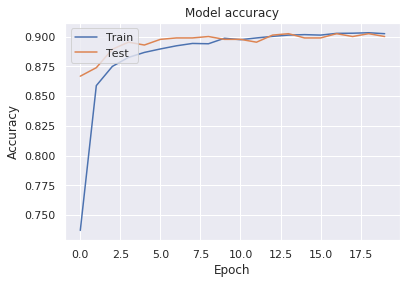

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

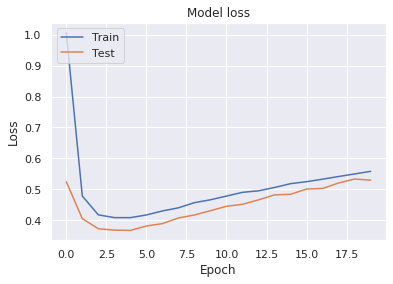

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**4. Evaluación de los resultados.**

**Ejercicio**: predecir las etiquetas de todo el set de testeo.

In [ ]:
y_test_pred = model.COMPLETAR(COMPLETAR)

Esto sirve para pasar de probabilidades a la etiqueta en sí. En este caso, la etiqueta es el dígito, y corresponde al número de columna.

In [ ]:
y_test_pred = np.argmax(y_test_pred, axis = 1)
y_test_pred.shape

**Ejercicio:** Calcular exactitud y la matriz de confusión para el conjunto de entrenamiento.

In [ ]:
from sklearn.metrics import confusion_matrix

y_test = np.argmax(y_test,axis = 1)

COMPLETAR(COMPLETAR, COMPLETAR)

In [ ]:
from sklearn.metrics import accuracy_score

COMPLETAR

**Ejercicio:** ¿Dónde se está confundiendo? Graficar algunos ejemplos.

In [ ]:
errores = COMPLETAR != COMPLETAR

In [ ]:
imagenes_errores = X_test[COMPLETAR,:]
y_test_errores = y_test[COMPLETAR]
y_test_pred_errores = y_test_pred[COMPLETAR]
print(imagenes_errores.shape)

In [ ]:
imagenes_errores = imagenes_errores.reshape(imagenes_errores.shape[0], ancho_imagen, largo_imagen)
print(imagenes_errores.shape)

In [ ]:
idx_imagen = np.random.randint(0,imagenes_errores.shape[0])
plt.figure(figsize = (6,6))
plt.title('Es un ' + str(y_test_errores[idx_imagen]) +'. Fue etiquetado como ' + str(y_test_pred_errores[idx_imagen]))
plt.imshow(imagenes_errores[idx_imagen, :, :])
plt.show()

**Ejercicio:** Volver a entrenar, pero agregando una capa con 800 neuronas y función de activación `relu`.